<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Images-Extractions" data-toc-modified-id="Images-Extractions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Images Extractions</a></span><ul class="toc-item"><li><span><a href="#Explore-datasets" data-toc-modified-id="Explore-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explore datasets</a></span></li><li><span><a href="#Some-visulizations" data-toc-modified-id="Some-visulizations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Some visulizations</a></span></li></ul></li><li><span><a href="#First-Baseline-With-Sklearn" data-toc-modified-id="First-Baseline-With-Sklearn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First Baseline With Sklearn</a></span><ul class="toc-item"><li><span><a href="#Modelisation" data-toc-modified-id="Modelisation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modelisation</a></span></li><li><span><a href="#convert-To-tensor-Dataset" data-toc-modified-id="convert-To-tensor-Dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>convert To tensor Dataset</a></span><ul class="toc-item"><li><span><a href="#Gridsearch" data-toc-modified-id="Gridsearch-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Gridsearch</a></span></li><li><span><a href="#Predict-GIZ-Biomass" data-toc-modified-id="Predict-GIZ-Biomass-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Predict GIZ Biomass</a></span></li></ul></li></ul></li></ul></div>

In this notebook, we will show you the differents steps to train step by step dly your model in this competition.

# Images Extractions

In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

2023-02-17 18:49:08.679785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 18:49:08.821598: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-17 18:49:08.844633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 18:49:08.844647: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [2]:
#!wget -q  https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_train.h5
#!wget -q  https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_val.h5
#!wget -q https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_test.h5

In [3]:
trainset = h5py.File("09072022_1154_train.h5", "r")
validateset = h5py.File("09072022_1154_val.h5", "r")
testset = h5py.File("09072022_1154_test.h5", "r")

In [4]:
# attributes of trainset
trainset.keys()

<KeysViewHDF5 ['agbd', 'cloud', 'images', 'lat', 'lon', 'scl']>

In [5]:
np.array(trainset['scl']).max()

10

<HDF5 dataset "cloud": shape (25036, 15, 15, 1), type "|u1">

## Explore datasets

In [87]:
# train
train_images = np.array(trainset['images'],dtype=np.float64)
train_images = train_images.transpose(0,3,1,2)

train_lat = np.array(trainset['lat'],dtype=np.float64)
train_lon = np.array(trainset['lon'],dtype=np.float64)
train_cloud = np.array(trainset['cloud'],dtype=np.float64)


train_biomasses = np.array(trainset['agbd'],dtype=np.float64)

# validate
validate_images = np.array(validateset['images'],dtype=np.float64)
validate_images = validate_images.transpose(0,3,1,2)

validate_lat = np.array(validateset['lat'],dtype=np.float64)
validate_lon = np.array(validateset['lon'],dtype=np.float64)
validate_cloud = np.array(validateset['cloud'],dtype=np.float64)


validate_biomasses = np.array(validateset['agbd'],dtype=np.float64)

# test 
test_images = np.array(testset['images'],dtype=np.float32)
test_images = test_images.transpose(0,3,1,2)
test_lat = np.array(testset['lat'],dtype=np.float64)
test_lon = np.array(testset['lon'],dtype=np.float64)
test_cloud = np.array(testset['cloud'],dtype=np.float64)


test_biomasses = np.array(testset['agbd'],dtype=np.float32)

In [7]:
print(f"train dataset size {train_images.shape} train lab size {train_biomasses.shape}")
print()
print(f"validate dataset size {validate_images.shape} validate lab size {validate_biomasses.shape}")
print()
print(f"test dataset size {test_images.shape} test lab size {test_biomasses.shape}")

train dataset size (25036, 12, 15, 15) train lab size (25036,)

validate dataset size (5174, 12, 15, 15) validate lab size (5174,)

test dataset size (5190, 12, 15, 15) test lab size (5190,)


<AxesSubplot: ylabel='Frequency'>

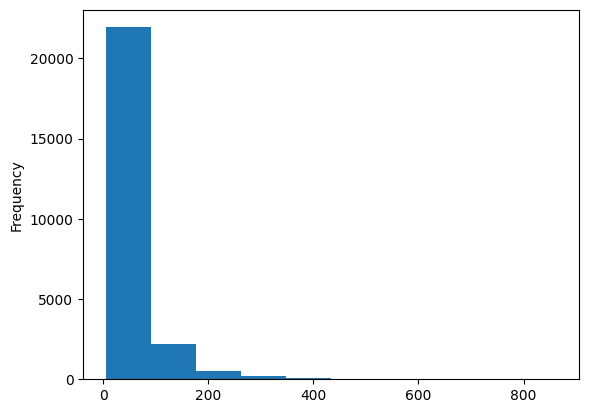

In [8]:
pd.Series(train_biomasses).plot(kind='hist')

##  Some visulizations

In [160]:
train_cloud[:,:,:].reshape((-1,225))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

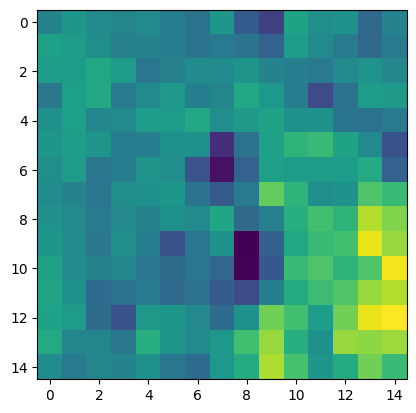

In [9]:
plt.imshow(train_images[1,1,:,:])

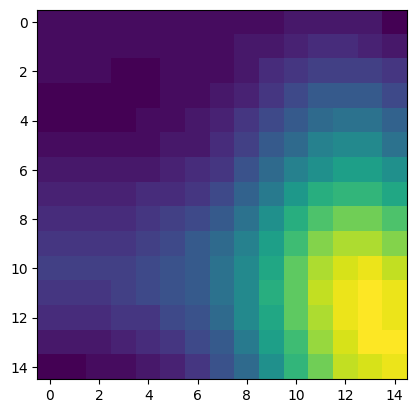

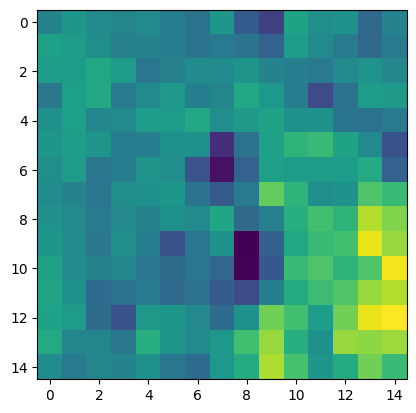

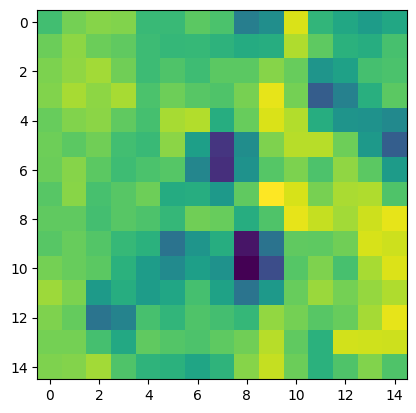

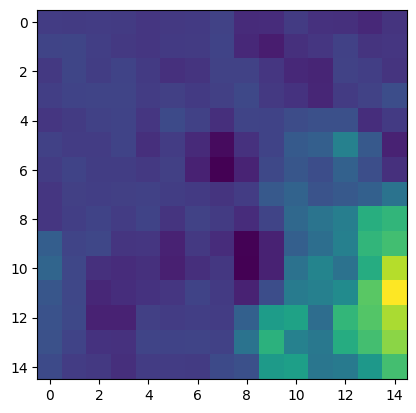

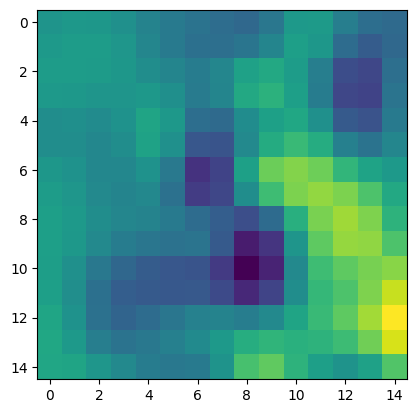

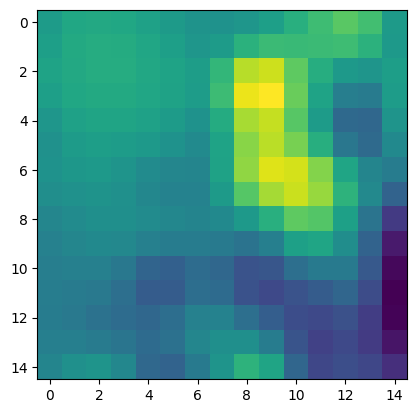

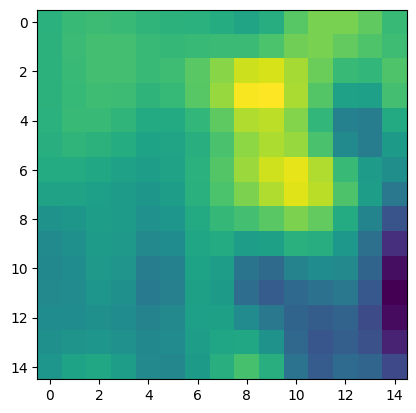

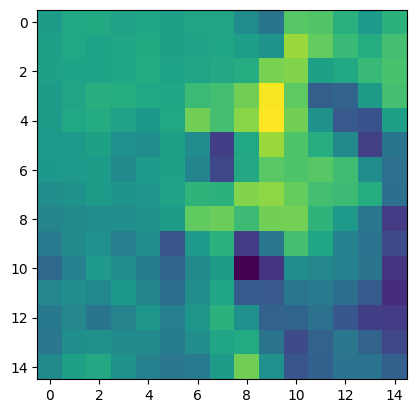

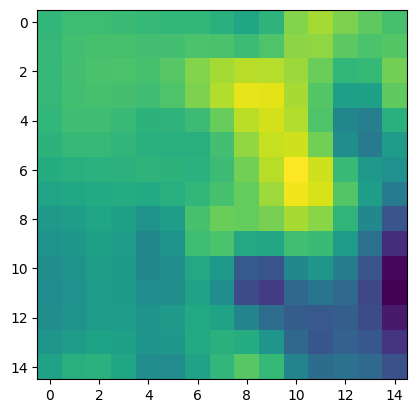

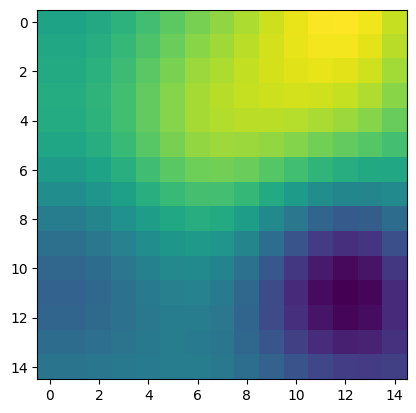

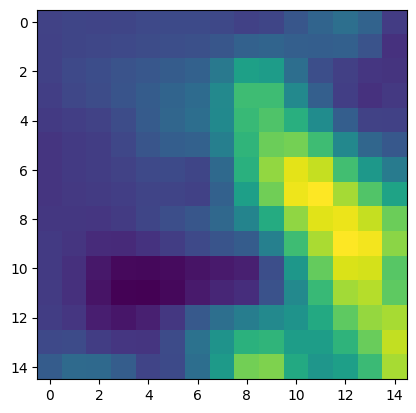

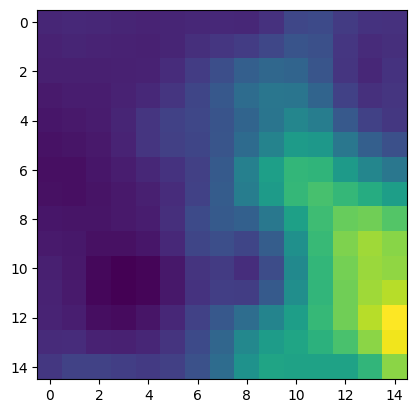

In [10]:
for k in range(12):
    plt.imshow(train_images[1,k,:,:])
    plt.show()

In [11]:
train_biomasses[1]

99.10187530517578

In [12]:
train_images.shape

(25036, 12, 15, 15)

In [13]:
train_images[:,2].shape

(25036, 15, 15)

In [86]:
train_cloud[0].shape

(15, 15, 1)

In [90]:
train_lon[0].shape

(15, 15, 1)

 **Below we explore the skewness of train dataset in each channel**

In [14]:
band_skewness = []
band_skewness_after_sqrt = []
for c in range(12):
    #calculate skewness
    band_skewness.append(pd.Series(train_images[:,c].flatten()).skew())
    #calculate skewness after applying sqrt
    band_skewness_after_sqrt.append(pd.Series(np.sqrt(train_images[:,c].flatten())).skew())

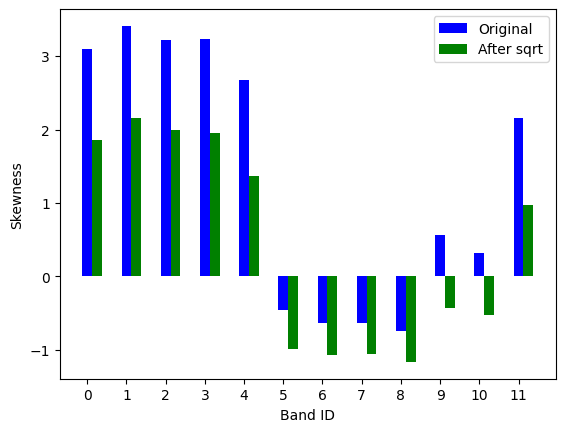

In [15]:
# skweness
width = 0.25

rng = [i for i in range(0,12)]
rng2 = [i+width for i in range(0,12)]

plt.bar(rng, band_skewness, align='center', width = width, label='Original', color ='b')
plt.bar(rng2, band_skewness_after_sqrt, align='center', width = width, label='After sqrt', color ='g')
plt.gca().set_xticks(rng)
plt.legend()
plt.xlabel('Band ID')
plt.ylabel('Skewness')
plt.show()

# First Baseline With Sklearn

In [16]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [17]:
from sklearn import set_config
set_config(display='diagram')

## Modelisation

## convert To tensor Dataset


In [18]:
train_lat[:,:,0].reshape((-1,15))[0]

array([6.87387276, 6.87378263, 6.87369204, 6.87360191, 6.87351131,
       6.87342119, 6.87333059, 6.87323999, 6.87314987, 6.87305927,
       6.87296915, 6.87287855, 6.87278843, 6.87269783, 6.87260771])

In [162]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=False)

trainimg=tf.data.Dataset.from_tensor_slices(train_images)
trainlat=tf.data.Dataset.from_tensor_slices(train_lat[:,:,0].reshape((-1,15)))
trainlon=tf.data.Dataset.from_tensor_slices(train_lon[:,:,0].reshape((-1,15)))
traincloud=tf.data.Dataset.from_tensor_slices(train_cloud[:,:,:].reshape((-1,225)))
trainbiom=tf.data.Dataset.from_tensor_slices( train_biomasses)
traindata=tf.data.Dataset.zip((trainimg,trainlat, trainlon, traincloud))
traindata=tf.data.Dataset.zip((traindata, trainbiom)).batch(32).prefetch(tf.data.AUTOTUNE)

validateimg=tf.data.Dataset.from_tensor_slices(validate_images) 
validatelat=tf.data.Dataset.from_tensor_slices(validate_lat[:,:,0].reshape((-1,15)))
validatelon=tf.data.Dataset.from_tensor_slices(validate_lon[:,:,0].reshape((-1,15)))
validatecloud=tf.data.Dataset.from_tensor_slices(validate_cloud[:,:,:].reshape((-1,225)))

validatebiom=tf.data.Dataset.from_tensor_slices( validate_biomasses)
validatedata=tf.data.Dataset.zip((validateimg,validatelat, validatelon, validatecloud))
validatedata=tf.data.Dataset.zip((validatedata, validatebiom)).batch(32).prefetch(tf.data.AUTOTUNE)

#traingen= datagen.flow( train_images,
#        y=train_biomasses,
#        batch_size=32,
#        shuffle=True,
#    )
#valgen= datagen.flow( validate_images,
#        y=validate_biomasses,
#        batch_size=32,
#        shuffle=True,
#    )


In [163]:
for k in traindata:
    print( k[0][2].shape)
    d=tf.keras.layers.Concatenate(axis=-1)([k[0][2],k[0][1]])
    print(d.shape)
    d=tf.keras.layers.Flatten()(d)
    print(d.shape)
    
    break

(32, 15)
(32, 30)
(32, 30)


In [202]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import Huber, MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import RMSprop, Adam,SGD
import tensorflow.keras.backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def input_ly( shape, data, norm=True):
    input_ = keras.Input(shape=shape)
    normalizer = tf.keras.layers.Normalization()
    normalizer.adapt(data)
    x_image = normalizer(input_)
    return input_, x_image


def generate_compile_model():
    model_v1 = tf.keras.models.Sequential([    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    #tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Lambda(lambda x:x*160)
    ])
    inputs_image,x_image= input_ly(( 12,15,15), train_images)
    x_image=tf.keras.layers.Flatten()(x_image)
    inputs_lat, x_lat=input_ly((15,1), train_lat, False)
    inputs_lon, x_lon=input_ly((15,1), train_lon, False)
    inputs_cloud, x_cloud=input_ly((225,1), train_cloud, False)
    outputs_images = model_v1(x_image)
    coord=tf.keras.layers.Concatenate(axis=1)([x_lat[0],x_lon[0],x_cloud[0]])
    coord=tf.keras.layers.Flatten()(coord)
    coord= tf.keras.layers.Dense(250, activation='relu')( coord)
    #coord= tf.keras.layers.Dropout(0.3)( coord)
    
    coord=tf.keras.layers.Concatenate(axis=-1)([coord,outputs_images])
    coord= tf.keras.layers.Dense(250, activation='relu')( coord)
    #coord= tf.keras.layers.Dense(150, activation='relu')( coord)
    coord= tf.keras.layers.Dropout(0.3)( coord)
    coord=tf.keras.layers.Dense(1, activation='relu')( coord)
    outputs= tf.keras.layers.Lambda(lambda x:x*160)(coord)
    model = keras.Model([inputs_image, inputs_lat,inputs_lon, inputs_cloud], outputs)
    
    model.compile(optimizer = Adam(
                    learning_rate=1e-7),
        loss = root_mean_squared_error, 
        metrics = [RootMeanSquaredError()]        
    )
    return model, model_v1
model, model_v1=generate_compile_model()


In [203]:
model_v1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_57 (Flatten)        (None, 2700)              0         
                                                                 
 dense_109 (Dense)           (None, 300)               810300    
                                                                 
 dropout_26 (Dropout)        (None, 300)               0         
                                                                 
 dense_110 (Dense)           (None, 1)                 301       
                                                                 
 lambda_36 (Lambda)          (None, 1)                 0         
                                                                 
Total params: 810,601
Trainable params: 810,601
Non-trainable params: 0
_________________________________________________________________


In [204]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_71 (InputLayer)          [(None, 15, 1)]      0           []                               
                                                                                                  
 input_72 (InputLayer)          [(None, 15, 1)]      0           []                               
                                                                                                  
 input_73 (InputLayer)          [(None, 225, 1)]     0           []                               
                                                                                                  
 normalization_66 (Normalizatio  (1, None, 15, 1)    3           ['input_71[0][0]']               
 n)                                                                                        

In [205]:
# constante for standardization
MEAN = train_images.mean((0,2,3))
STD = train_images.std((0,2,3))

In [206]:
# Evaluate( with the hands) the max
np.max(train_images.reshape(25036, 12,225),axis=2).max()

15687.0

In [207]:
checkpoint_filepath='./checkpoints/'

In [208]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_root_mean_squared_error',
    mode='min',
    save_best_only=True)


In [209]:
history=model.fit(
            traindata,
        validation_data = validatedata,
            #steps_per_epoch = 100,
            epochs = 100,
            #validation_steps = 50,
            callbacks=[model_checkpoint_callback],
            verbose = 2)

Epoch 1/100
783/783 - 3s - loss: 687.0418 - root_mean_squared_error: 771.3701 - val_loss: 74.2730 - val_root_mean_squared_error: 81.9334 - 3s/epoch - 4ms/step
Epoch 2/100
783/783 - 3s - loss: 248.6344 - root_mean_squared_error: 298.5467 - val_loss: 71.1004 - val_root_mean_squared_error: 79.0157 - 3s/epoch - 4ms/step
Epoch 3/100
783/783 - 4s - loss: 129.0337 - root_mean_squared_error: 158.3972 - val_loss: 70.0510 - val_root_mean_squared_error: 78.0310 - 4s/epoch - 5ms/step
Epoch 4/100
783/783 - 4s - loss: 101.2290 - root_mean_squared_error: 132.8673 - val_loss: 69.0808 - val_root_mean_squared_error: 77.1282 - 4s/epoch - 5ms/step
Epoch 5/100
783/783 - 4s - loss: 85.0400 - root_mean_squared_error: 96.6505 - val_loss: 68.2448 - val_root_mean_squared_error: 76.3515 - 4s/epoch - 5ms/step
Epoch 6/100
783/783 - 3s - loss: 80.9314 - root_mean_squared_error: 92.4874 - val_loss: 67.4491 - val_root_mean_squared_error: 75.5965 - 3s/epoch - 4ms/step
Epoch 7/100
783/783 - 3s - loss: 76.0963 - root_me

Epoch 53/100
783/783 - 4s - loss: 60.3037 - root_mean_squared_error: 63.9356 - val_loss: 59.3043 - val_root_mean_squared_error: 67.8781 - 4s/epoch - 5ms/step
Epoch 54/100
783/783 - 4s - loss: 60.2450 - root_mean_squared_error: 63.6703 - val_loss: 59.3050 - val_root_mean_squared_error: 67.8768 - 4s/epoch - 5ms/step
Epoch 55/100
783/783 - 4s - loss: 60.4118 - root_mean_squared_error: 64.0190 - val_loss: 59.2928 - val_root_mean_squared_error: 67.8597 - 4s/epoch - 5ms/step
Epoch 56/100
783/783 - 4s - loss: 59.9835 - root_mean_squared_error: 63.4725 - val_loss: 59.2970 - val_root_mean_squared_error: 67.8634 - 4s/epoch - 5ms/step
Epoch 57/100
783/783 - 4s - loss: 60.0229 - root_mean_squared_error: 63.5184 - val_loss: 59.2858 - val_root_mean_squared_error: 67.8493 - 4s/epoch - 5ms/step
Epoch 58/100
783/783 - 4s - loss: 59.8981 - root_mean_squared_error: 63.4011 - val_loss: 59.2811 - val_root_mean_squared_error: 67.8419 - 4s/epoch - 5ms/step
Epoch 59/100
783/783 - 4s - loss: 60.1597 - root_mea

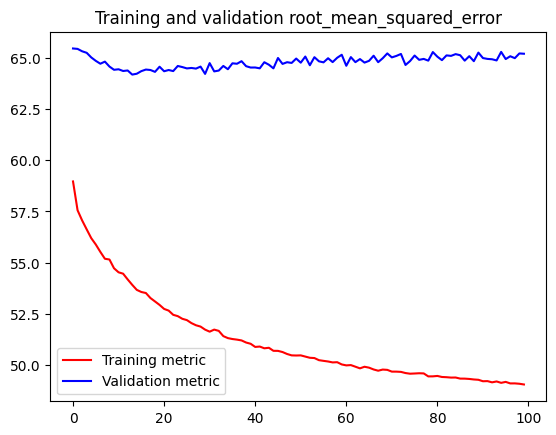

<Figure size 640x480 with 0 Axes>

In [174]:
import matplotlib.pyplot as plt
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training metric')
plt.plot(epochs, val_acc, 'b', label='Validation metric')
plt.title('Training and validation root_mean_squared_error')
plt.legend(loc=0)
plt.figure()


plt.show()

In [182]:


# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))



In [183]:
history=model.fit(
        traindata,
        validation_data = validatedata,
        #steps_per_epoch = 100,
        epochs = 100,
        #validation_steps = 50,
        verbose = 2,
        callbacks=[lr_schedule])

Epoch 1/100
783/783 - 3s - loss: 131.6732 - root_mean_squared_error: 165.0321 - val_loss: 73.2176 - val_root_mean_squared_error: 80.6391 - lr: 1.0000e-08 - 3s/epoch - 4ms/step
Epoch 2/100
783/783 - 3s - loss: 120.4682 - root_mean_squared_error: 151.6520 - val_loss: 73.4594 - val_root_mean_squared_error: 80.9503 - lr: 1.1220e-08 - 3s/epoch - 4ms/step
Epoch 3/100
783/783 - 3s - loss: 124.5624 - root_mean_squared_error: 158.6784 - val_loss: 73.6842 - val_root_mean_squared_error: 81.2785 - lr: 1.2589e-08 - 3s/epoch - 4ms/step
Epoch 4/100
783/783 - 3s - loss: 112.0582 - root_mean_squared_error: 140.4341 - val_loss: 73.9576 - val_root_mean_squared_error: 81.5682 - lr: 1.4125e-08 - 3s/epoch - 4ms/step
Epoch 5/100
783/783 - 3s - loss: 108.4345 - root_mean_squared_error: 134.4214 - val_loss: 74.2364 - val_root_mean_squared_error: 81.8229 - lr: 1.5849e-08 - 3s/epoch - 4ms/step
Epoch 6/100
783/783 - 3s - loss: 106.0188 - root_mean_squared_error: 131.9408 - val_loss: 74.5400 - val_root_mean_square

Epoch 48/100
783/783 - 3s - loss: 58.9304 - root_mean_squared_error: 62.4495 - val_loss: 58.8732 - val_root_mean_squared_error: 67.4822 - lr: 2.2387e-06 - 3s/epoch - 4ms/step
Epoch 49/100
783/783 - 4s - loss: 58.6834 - root_mean_squared_error: 62.2687 - val_loss: 58.7718 - val_root_mean_squared_error: 67.3967 - lr: 2.5119e-06 - 4s/epoch - 5ms/step
Epoch 50/100
783/783 - 3s - loss: 58.2913 - root_mean_squared_error: 61.8796 - val_loss: 58.6898 - val_root_mean_squared_error: 67.3063 - lr: 2.8184e-06 - 3s/epoch - 4ms/step
Epoch 51/100
783/783 - 3s - loss: 58.0197 - root_mean_squared_error: 61.6187 - val_loss: 58.5862 - val_root_mean_squared_error: 67.2116 - lr: 3.1623e-06 - 3s/epoch - 4ms/step
Epoch 52/100
783/783 - 4s - loss: 57.8183 - root_mean_squared_error: 61.4655 - val_loss: 58.5364 - val_root_mean_squared_error: 67.1840 - lr: 3.5481e-06 - 4s/epoch - 5ms/step
Epoch 53/100
783/783 - 4s - loss: 57.4792 - root_mean_squared_error: 61.1446 - val_loss: 58.4295 - val_root_mean_squared_erro

Epoch 95/100
783/783 - 4s - loss: 51.2451 - root_mean_squared_error: 55.3775 - val_loss: 55.1182 - val_root_mean_squared_error: 64.0273 - lr: 5.0119e-04 - 4s/epoch - 5ms/step
Epoch 96/100
783/783 - 4s - loss: 51.1617 - root_mean_squared_error: 55.2966 - val_loss: 55.0203 - val_root_mean_squared_error: 64.1360 - lr: 5.6234e-04 - 4s/epoch - 5ms/step
Epoch 97/100
783/783 - 4s - loss: 51.1721 - root_mean_squared_error: 55.2893 - val_loss: 55.0326 - val_root_mean_squared_error: 64.1397 - lr: 6.3096e-04 - 4s/epoch - 5ms/step
Epoch 98/100
783/783 - 4s - loss: 51.3002 - root_mean_squared_error: 55.4294 - val_loss: 55.0423 - val_root_mean_squared_error: 64.0561 - lr: 7.0795e-04 - 4s/epoch - 5ms/step
Epoch 99/100
783/783 - 4s - loss: 51.2173 - root_mean_squared_error: 55.3286 - val_loss: 55.0618 - val_root_mean_squared_error: 64.1909 - lr: 7.9433e-04 - 4s/epoch - 5ms/step
Epoch 100/100
783/783 - 4s - loss: 51.1157 - root_mean_squared_error: 55.2344 - val_loss: 55.1192 - val_root_mean_squared_err

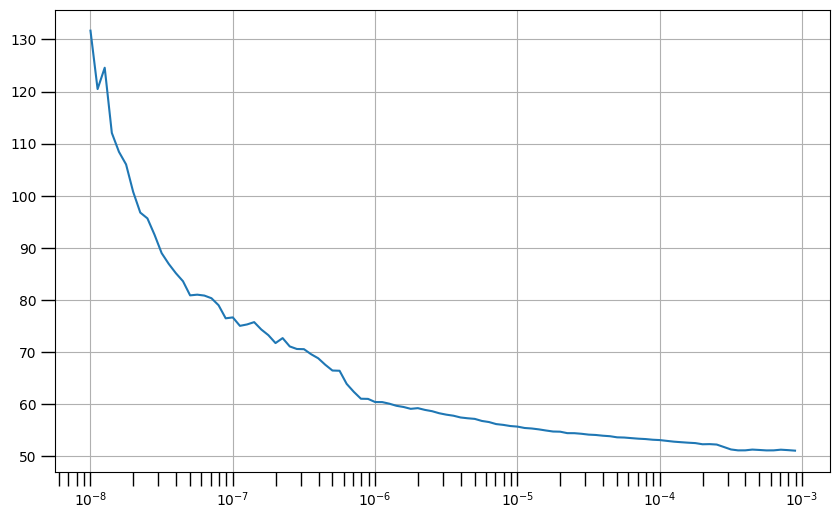

In [185]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
#plt.axis([1e-8, 1e-3, 0, 300])

In [159]:
# predict
#pred_train = pipe.predict(train_images)

# train mse error
#mse = mean_squared_error(train_biomasses, pred_train) 
#mse
#rmse = np.sqrt(mse)

In [19]:
# predict
#pred_validate = pipe.predict(validate_images)

#  validate mse error
#mse = mean_squared_error(validate_biomasses, pred_validate) 
#mse
#rmse = np.sqrt(mse)
3961.942859655493

3961.942859655493

### Gridsearch

 Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier'] = [LinearRegression()]

param2 = {}
param2['classifier__alpha'] = [0.1, 0.5, 1]
param2['classifier'] = [Ridge()]

param3 = {}
param3['classifier__alpha'] = [0.1, 0.5, 1]
param3['classifier'] = [Lasso()]

param4 = {}
param4['classifier__n_neighbors'] = [2,5,10,25,50]
param4['classifier'] = [KNeighborsRegressor()]

"""
param5 = {}
param5['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param5['classifier__epsilon'] = [0.0,0.2,0.5,1]
param5['classifier'] = [LinearSVR()]
"""

pipeline = pipe = Pipeline(steps=[("scaler", CustomScaler(MEAN,STD)),
                       ("flatten", FlattenTransformer()),
                       ("classifier", LinearRegression())])
params = [param1, param2, param3, param4] # param5


 Train the grid search model
grid_search = GridSearchCV(pipeline, params, cv=3, scoring='neg_mean_squared_error').fit(train_images,train_biomasses)

 Best performing model and its corresponding hyperparameters
grid_search.best_params_

model = grid_search.best_estimator_
 predict
pred = model.predict(train_images)

 validate mse error
mse = mean_squared_error(train_biomasses, pred) 
rmse = np.sqrt(mse)

print(mse, rmse)

model = grid_search.best_estimator_
 predict
pred = model.predict(validate_images)

 validate mse error
mse = mean_squared_error(validate_biomasses, pred) 
rmse = np.sqrt(mse)

print(mse, rmse)

### Predict GIZ Biomass

In [122]:
s2_images_h5 = h5py.File("./data/images_test.h5", "r")

In [215]:
model.load_weights(checkpoint_filepath)


In [203]:
testset.keys()

<KeysViewHDF5 ['agbd', 'cloud', 'images', 'lat', 'lon', 'scl']>

In [141]:
testimg=tf.data.Dataset.from_tensor_slices(test_images)

testlat=tf.data.Dataset.from_tensor_slices(test_lat[:,:,0].reshape((-1,15)))
testlon=tf.data.Dataset.from_tensor_slices(test_lon[:,:,0].reshape((-1,15)))
testdata=tf.data.Dataset.zip((testimg,testlat, testlon)).batch(32)


In [354]:
#prepare test set sentinel 2 images 
#s2_images = np.array(s2_images_h5["images"])
#s2_images = s2_images.transpose(0,3,1,2)

In [216]:
loss_eval, rmse_eval=model.evaluate(validatedata)
loss_eval, rmse_eval
#(54.43159866333008, 63.476097106933594)

162/162 [==============================] - 0s 2ms/step - loss: 56.9318 - root_mean_squared_error: 65.7728


(56.93183517456055, 65.77277374267578)

In [217]:
model.metrics_names 

['loss', 'root_mean_squared_error']

In [219]:
# predict on giz test data
pred_giz = model.predict([test_images,test_lat[:,:,0].reshape((-1,15)), test_lon[:,:,0].reshape((-1,15)) ])
pred_giz.shape

163/163 [==============================] - 0s 1ms/step


(5190, 1)

In [220]:
pred_giz.max()

71.258865

In [221]:
pred_giz=pred_giz.reshape(1,-1)[0]

In [222]:
ID_S2_pair = pd.read_csv('./data/UniqueID-SentinelPair.csv')

preds = pd.DataFrame({'Target':pred_giz}).rename_axis('S2_idx').reset_index()
preds = ID_S2_pair.merge(preds, on='S2_idx').drop(columns=['S2_idx'])

In [223]:

preds.to_csv(f'GIZ_Biomass_predictions_{rmse_eval}.csv', index=False)

In [224]:
preds

,ID,Target
0,ID_1EB0DGFP07,20.650194
1,ID_844T2PSXTK,45.734779
2,ID_4MCV3S8MLN,24.583229
3,ID_L7441JV5F3,0.000000
4,ID_5GUVM4YEWZ,24.172304
...,...,...
85,ID_MEW6189J1B,20.551460
86,ID_TH9HRUXGTP,24.196527
87,ID_GPC7YS3JG8,42.248810
88,ID_1P7PJMPV0R,30.628073
